# #100Viz 05: Visualizing Strata

Source: INEGI, MMSI 2016. <br>

In [ ]:
import pandas as pd
import altair as alt
%run scripts/cimarron_theme_mod.py

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

In [ ]:
%%html
<style>
@import url("https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono");
</style>

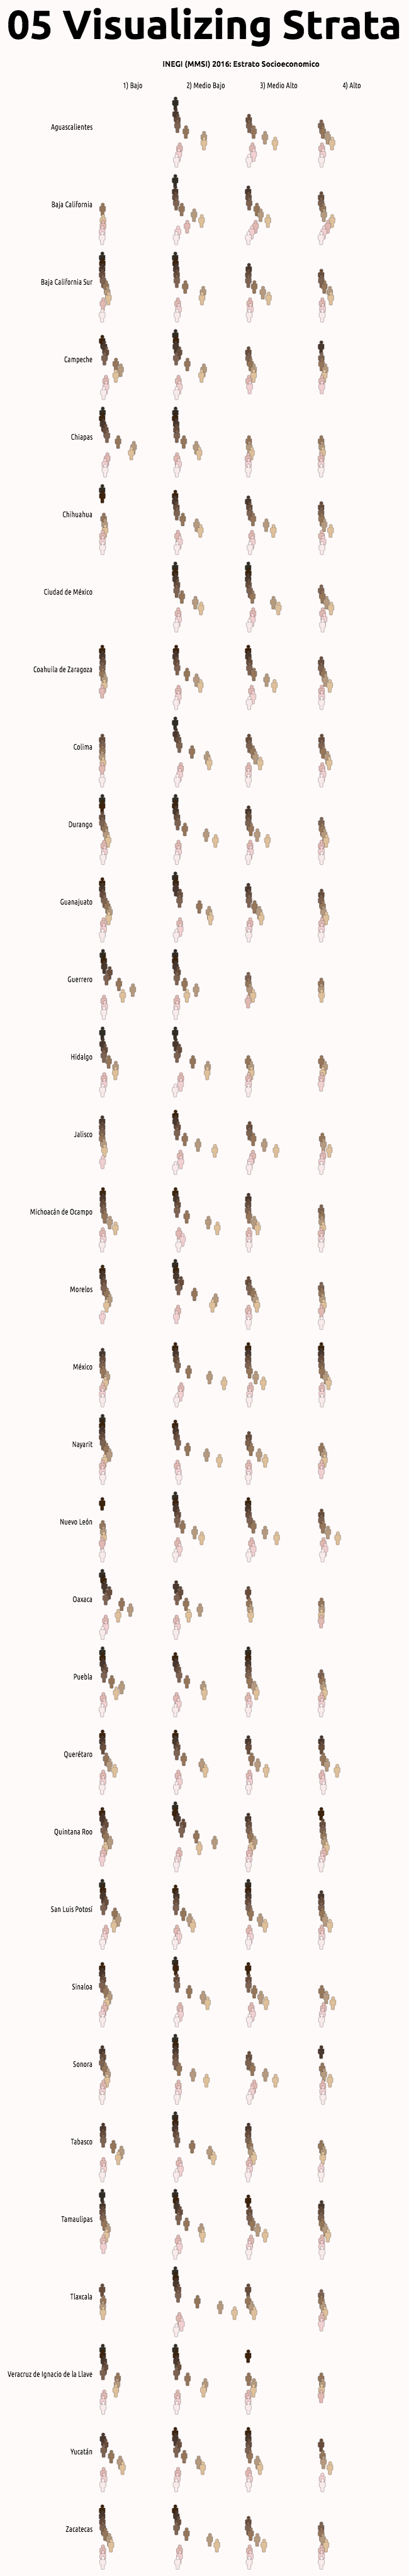

In [81]:
df =  pd.read_csv("../data/processed/data_cleaned.csv", encoding = "utf-8",)
df.sort_values("estrato_socioeconomico", inplace = True)


data = df.groupby(["nom_entidad", "estratos", "tono_de_color_de_piel"])["cuenta"].sum().to_frame().reset_index()
data["shape"] = "person"

domains = [1,2,3,4,5,6,7,8,9,10,11]
colors = ["#322e25", "#3d230c", "#4a382e", "#684d3c", "#7e6352", "#95765a", "#b59a7f", "#dec09a", "#e1b8b2", "#f2d0d1", "#f9ebeb"]

person = 'M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z'
        
shape_scale = alt.Scale(
    domain=["person"],
    range=[
        person, person, person, person, person, person, person, person, person, person, person, 
    ]
)

color_scale = alt.Scale(
    domain=domains,
    range=colors
)


bar = alt.Chart(data).mark_point(filled=True, strokeWidth = 0.3, stroke = "#282828").encode(
    alt.X('cuenta:Q', axis=None),
    alt.Y('tono_de_color_de_piel:O', axis=None),
    alt.Column('estratos:O', header=alt.Header(title="INEGI (MMSI) 2016: Estrato Socioeconomico"),),
    alt.Color('tono_de_color_de_piel:N', legend=None, scale=color_scale),
    alt.OpacityValue(1),
    alt.Row("nom_entidad:O", header=alt.Header(title = "", labelAngle=360,)),
    alt.Shape("shape:N", scale = shape_scale, legend = None,)
).properties(width=100, height=100)

bar.properties(title = "05 Visualizing Strata")